

### Problem statement:- Predict the total number of confirmed cases :



#### Import fbprophet :

In [52]:
import fbprophet

In [53]:
from fbprophet import Prophet

#### To check all the function & modules inside Prophet :


In [54]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

#### Import Pandas Library :

In [55]:
import pandas as pd

#### Import Dataset :

In [56]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

#### View Top 5 Rows :

In [57]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


#### View Bottom 5 Rows :

In [58]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


#### View DataType :

In [59]:
df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

#### View Shape :

In [60]:
df.shape

(49068, 10)

#### Change "Date" column DataType to DateTime DataType :

In [61]:
df['Date'] = pd.to_datetime(df['Date'])

In [62]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

#### Check for the Null Values :

In [63]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

#### Count number of Unique Dates :

In [64]:
df['Date'].nunique()

188

#### Group the Data :

In [65]:
total=df.groupby(['Date'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [66]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


#### Rename Columns "

In [67]:
df_prophet = total.rename(columns={'Date':'ds','Confirmed':'y'})

In [68]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [69]:
m = Prophet()

In [70]:
model = m.fit(df_prophet)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [71]:
model.seasonalities

OrderedDict([('weekly',
              {'condition_name': None,
               'fourier_order': 3,
               'mode': 'additive',
               'period': 7,
               'prior_scale': 10.0})])

#### ForeCast the Data :

In [72]:
future_global=model.make_future_dataframe(periods=30,freq='D')

In [73]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [74]:
df_prophet.shape

(188, 5)

In [75]:
future_global.shape

(218, 1)

In [76]:
df_prophet['ds'].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [77]:
future_global.tail()

,ds
213,2020-08-22
214,2020-08-23
215,2020-08-24
216,2020-08-25
217,2020-08-26


#### Now do Prediction on future_global :


In [78]:
prediction = model.predict(future_global)


In [79]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.323896e+03,-1.222865e+05,8.095605e+04,-9.323896e+03,-9.323896e+03,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,-10979.704311,0.0,0.0,0.0,-2.030360e+04
1,2020-01-23,-6.626094e+03,-1.179633e+05,8.782437e+04,-6.626094e+03,-6.626094e+03,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,-1101.212489,0.0,0.0,0.0,-7.727307e+03
2,2020-01-24,-3.928293e+03,-9.967490e+04,1.070951e+05,-3.928293e+03,-3.928293e+03,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,10055.768575,0.0,0.0,0.0,6.127475e+03
3,2020-01-25,-1.230492e+03,-1.004756e+05,1.200601e+05,-1.230492e+03,-1.230492e+03,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,1.249814e+04
4,2020-01-26,1.467309e+03,-9.111911e+04,1.166897e+05,1.467309e+03,1.467309e+03,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,8.746118e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144165e+07,2.105392e+07,2.185010e+07,2.105804e+07,2.183304e+07,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,13728.634691,0.0,0.0,0.0,2.145538e+07
214,2020-08-23,2.164576e+07,2.123451e+07,2.207732e+07,2.124287e+07,2.206056e+07,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,7278.808727,0.0,0.0,0.0,2.165304e+07
215,2020-08-24,2.184988e+07,2.142276e+07,2.231269e+07,2.142513e+07,2.229729e+07,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,-2146.590152,0.0,0.0,0.0,2.184773e+07
216,2020-08-25,2.205399e+07,2.158000e+07,2.251400e+07,2.160818e+07,2.253159e+07,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,-16835.705042,0.0,0.0,0.0,2.203715e+07


In [80]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145538e+07,2.105392e+07,2.185010e+07
214,2020-08-23,2.165304e+07,2.123451e+07,2.207732e+07
215,2020-08-24,2.184773e+07,2.142276e+07,2.231269e+07
216,2020-08-25,2.203715e+07,2.158000e+07,2.251400e+07
217,2020-08-26,2.224712e+07,2.176433e+07,2.274702e+07


#### Plot the predictions u will see these are with respect to yhat :


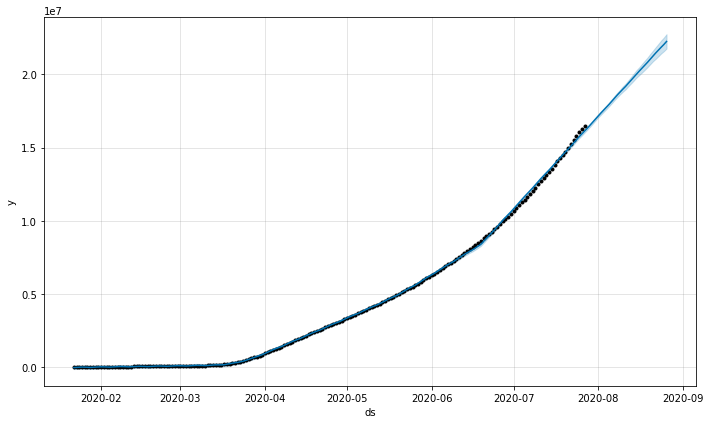

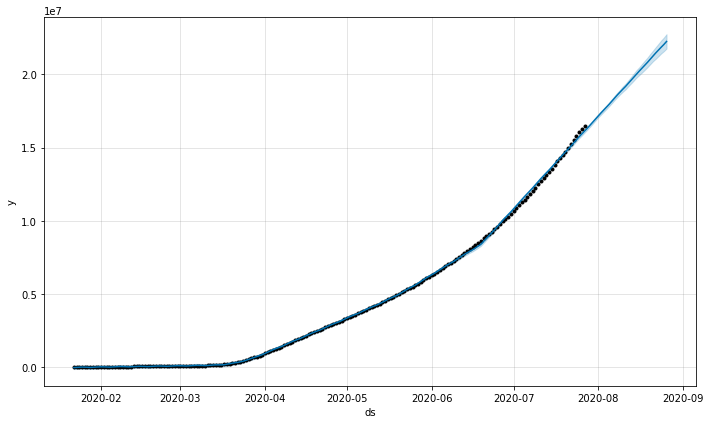

In [81]:
model.plot(prediction)

### Conclusion :
#### This is what our prediction looks like. The direction of overall case numbers is probably true, u will observe how cases rises exponentially .

#### Visualize Each Components[Trends,Weekly] :


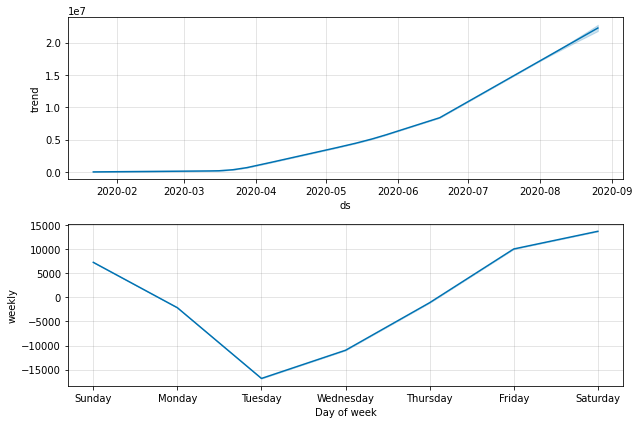

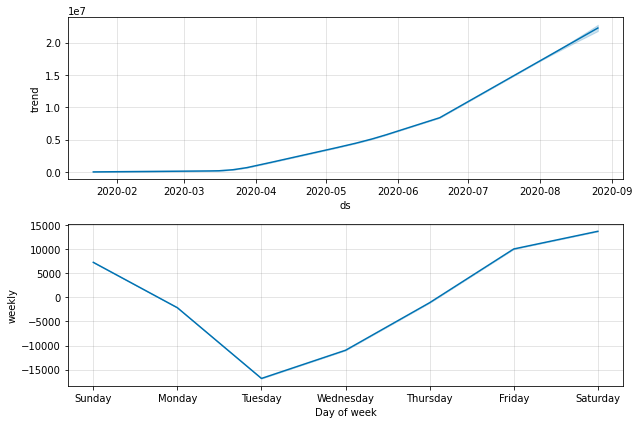

In [82]:
model.plot_components(prediction)

#### The prophet model identifies points at which the trend changes and those can be plotted :


In [83]:
from fbprophet.plot import add_changepoints_to_plot

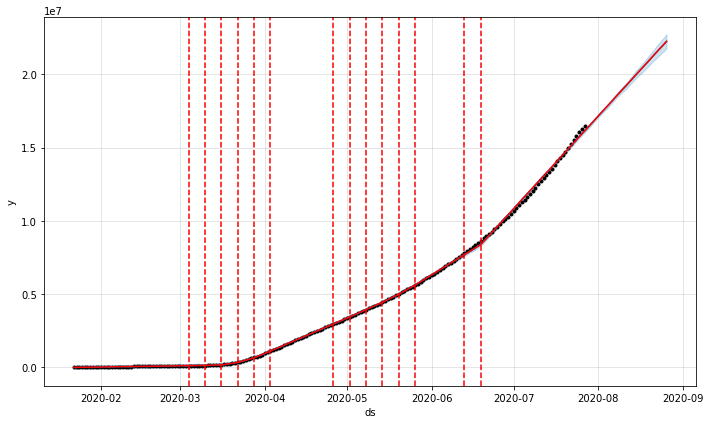

In [84]:
fig=model.plot(prediction)

a=add_changepoints_to_plot(fig.gca(),model,prediction)


#### Cross Validation :

In [85]:
from fbprophet.diagnostics import cross_validation

In [86]:
df_cv = cross_validation(model,horizon='30 days',period='15 days',initial='90 days')


INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


In [87]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195772e+06,3.206423e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279171e+06,3.292055e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361445e+06,3.377795e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439136e+06,3.461249e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.513525e+06,3.544699e+06,3515244,2020-04-28


In [88]:
df_cv.shape

(150, 6)

#### Obtaining the Performance Metrics :


#### We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates :


In [89]:
from fbprophet.diagnostics import performance_metrics

In [90]:
df_performance = performance_metrics(df_cv)


In [91]:
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.721596e+10,164972.604876,129190.213315,0.016867,0.017675,0.000000
1,4 days,3.770271e+10,194171.855844,151379.846239,0.019330,0.022485,0.000000
2,5 days,5.170151e+10,227379.657369,175214.816680,0.021780,0.025717,0.066667
3,6 days,6.937441e+10,263390.225361,202192.647173,0.024558,0.026714,0.133333
4,7 days,9.012810e+10,300213.430311,232530.254272,0.027838,0.031274,0.200000


In [92]:
from fbprophet.plot import plot_cross_validation_metric

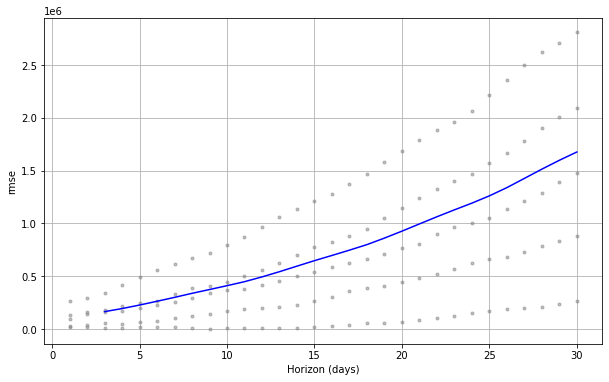

In [93]:
df_performance=plot_cross_validation_metric(df_cv,metric='rmse')

#### RMSE PLOT :

```
`# This is formatted as code`
```



#### MSE PLOT :

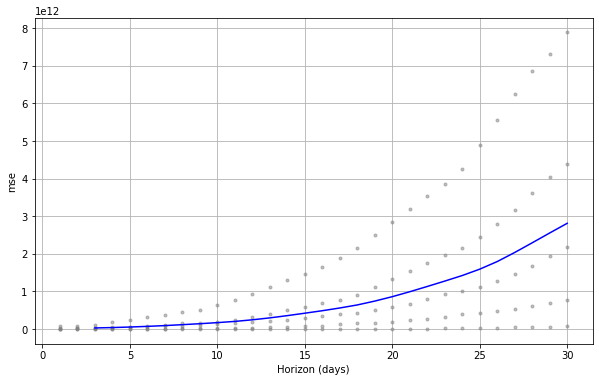

In [94]:
df_performance=plot_cross_validation_metric(df_cv,metric='mse')

#### MAPE PLOT :

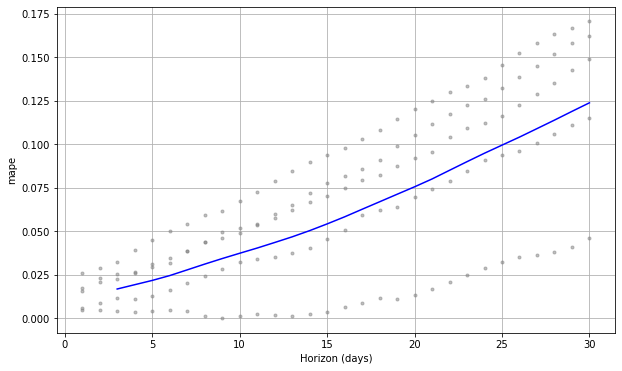

In [95]:
df_performance=plot_cross_validation_metric(df_cv,metric='mape')

In [96]:
#### ......................... Thank You ...........................